# Importing Libraries and Loading CSV into DataFrame

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
android_df = pd.read_csv('android-games-clean.csv')

# Adding columns for visualizing specific insights

In [96]:
# Added precise rating column, because the average rating column from the dataset is floored
android_df_with_ratings = android_df
android_df_with_ratings["precise rating"] = ((5 * android_df_with_ratings['5 star ratings']) + (4 * android_df_with_ratings['4 star ratings']) + (3 * android_df_with_ratings['3 star ratings']) + (2 * android_df_with_ratings['2 star ratings']) + android_df_with_ratings['1 star ratings']) / (android_df_with_ratings['5 star ratings'] + android_df_with_ratings['4 star ratings'] + android_df_with_ratings['3 star ratings'] + android_df_with_ratings['2 star ratings'] + android_df_with_ratings['1 star ratings'])

In [97]:
# Finding the rating difference between the precise rating and the average rating
android_df_with_ratings["rating difference"] = android_df_with_ratings["precise rating"] - android_df_with_ratings["average rating"]

In [98]:
# Sorting the DataFrame from the highest rating
android_df_with_ratings.sort_values(by='precise rating', ascending=False)

,Unnamed: 0,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,precise rating,rating difference
719,745,20,超級單字王 - 英檢、多益、托福 輕鬆學,158721,500000,4,0.6,1.1,0.0,EDUCATIONAL,149917,6111,1435,358,897,4.914043,0.914043
928,954,29,Indy Cat for VK,998983,5000000,4,0.0,0.0,0.0,PUZZLE,931620,35619,10710,5345,15686,4.864043,0.864043
550,576,51,Free Slot Machines with Bonus Games!,207326,5000000,4,0.2,0.5,0.0,CASINO,189655,7941,3925,1388,4415,4.818569,0.818569
1660,1688,61,Aplasta Palabras：Juego de Palabras Gratis sin ...,214313,10000000,4,17.1,5556.2,0.0,WORD,189623,16387,4835,935,2530,4.818105,0.818105
1698,1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5000000,4,1.9,4.1,0.0,WORD,99987,4766,1469,953,2353,4.817627,0.817627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,1603,78,TopQuiz -Play Quiz & Lottery | Win Money via P...,55313,1000000,3,0.2,0.5,0.0,TRIVIA,24360,4660,2947,2499,20844,3.166209,0.166209
304,304,5,모두의마블,1590460,10000000,3,0.0,0.0,0.0,BOARD,664388,137875,140391,88652,559151,3.163285,0.163285
892,918,93,Piano Music Tiles 2 - Free Music Games,37291,5000000,3,3.2,6.8,0.0,MUSIC,13975,3720,3521,3043,13030,3.068841,0.068841
847,873,48,Au Mobile VTC – Game nhảy Audition,104261,5000000,3,0.2,0.4,0.0,MUSIC,43790,6890,6890,5510,41180,3.063303,0.063303


In [99]:
# Adding a lost rating column to show the amount of rating lost due to rounding
android_df_with_ratings['lost rating'] = android_df_with_ratings["rating difference"].apply(lambda x: True if x >= 0.5 else False)

# Visualizing the cleaned and extended DataFrame

# Double Bar Plot
1. Category-based bar plot, where the total ratings are for each category
2. Grouped by whether or not they lost ratings by having the average rating be determined by the floor of the average, rather than by rounding the average to a couple of decimal places
3. Counts the total ratings of the games which lost ratings vs games didn't lose ratings
4. Relationship between total ratings, and whether a game lost a rating

On action, most of the games didn't lose ratings at all. Whereas for card games, a lot of them lost ratings.
While for casino, there is not much of a difference.

<AxesSubplot:xlabel='category', ylabel='precise rating'>

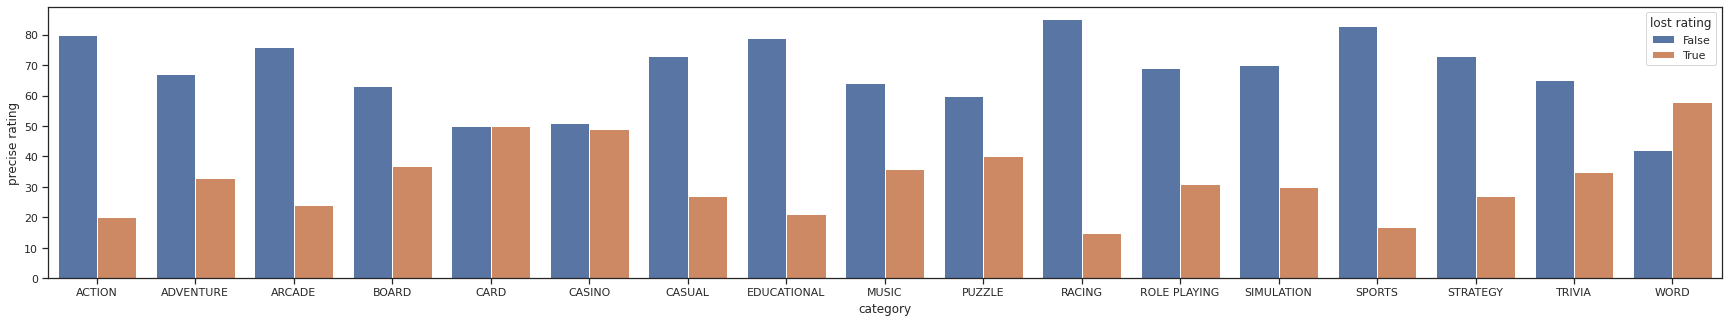

In [100]:
fig, ax = plt.subplots(figsize=(30,5))

android_df_lost_rating = android_df_with_ratings.groupby(["lost rating", "category"]).count()[["precise rating"]].reset_index()

sns.barplot(data=android_df_lost_rating, x="category", y="precise rating", hue="lost rating", ax=ax)

# Multi-Colored Single Bar Plot
1. With this bar plot, you can see the average rating overlayed on top of the price rating
2. Used to see how much the ratings for each category changed by taking the floor of the rating

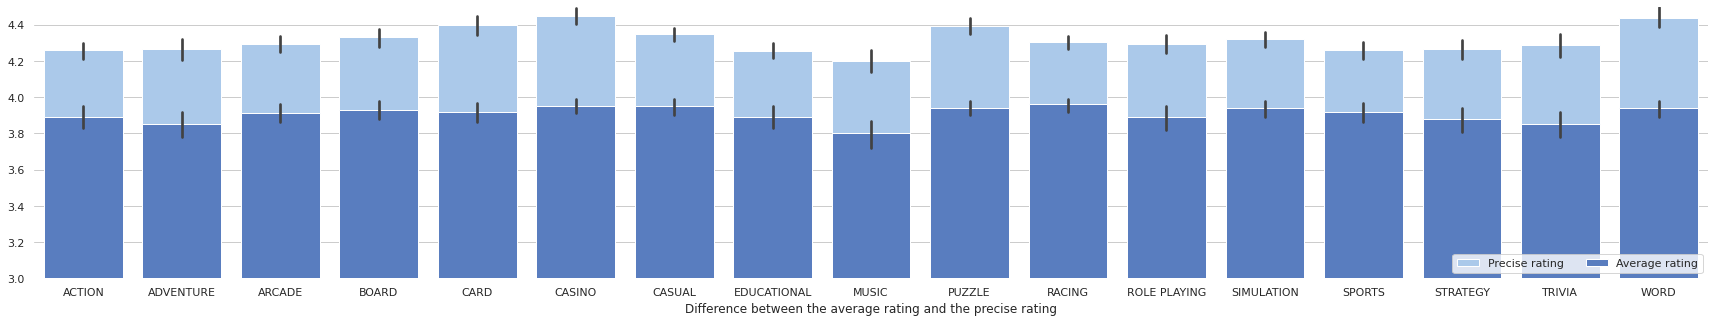

In [101]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(30, 5))

# Plot the light-blue colored values
sns.set_color_codes("pastel")
sns.barplot(x="category", y="precise rating", data=android_df_with_ratings,
            label="Precise rating", color="b")

# Plot the dark-blue colored values overlayed on top of the previous bars
sns.set_color_codes("muted")
sns.barplot(x="category", y="average rating", data=android_df_with_ratings,
            label="Average rating", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", ylim=plt.ylim(3,4.5),
       xlabel="Difference between the average rating and the precise rating")
sns.despine(left=True, bottom=True)

# Joint Plot
1. Shows the correlation between the precise rating and the total ratings for the game
2. The marginal distribution shows that most of the ratings are around 4, almost all of the total ratings are around 0-1 million total ratings

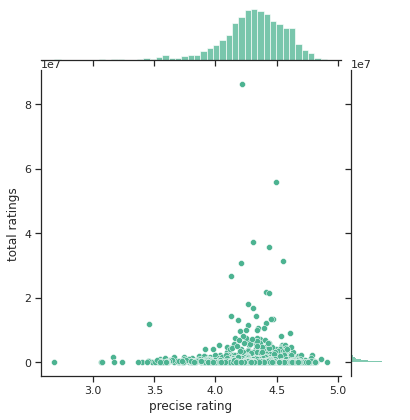

In [102]:
sns.set_theme(style="ticks")

sns.jointplot(data=android_df_with_ratings, x="precise rating", y="total ratings", color="#4CB391")

# Horizontal Bar Plot:
1. Calculates the total amount of installs per Category
2. Visual represeantation of most install Games per Category.

Text(0, 0.5, 'Game Category')

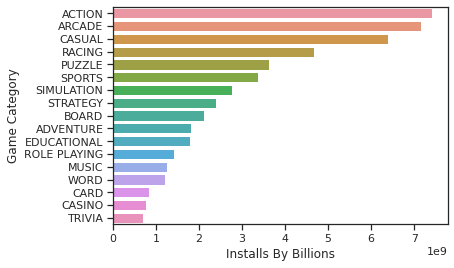

In [103]:
import seaborn as sns
number_of_installs_and_category_data = android_df[['installs', 'category']].groupby('category').sum().sort_values('installs', ascending=False).reset_index()

ax = sns.barplot(data=number_of_installs_and_category_data, x='installs', y='category')
ax.set_xlabel('Installs By Billions')
ax.set_ylabel('Game Category')

# Vertical Bar Plots

Comparison between the total number of downloads per categorie and the amount of times it got a rating

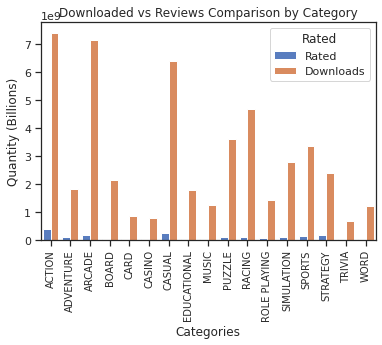

In [104]:
rating_percentage_per_category = android_df[['category', 'total ratings', 'installs']].groupby('category').sum().reset_index()
ax = sns.barplot(x='category', y='value', hue='variable', data=pd.melt(rating_percentage_per_category, ['category']), palette='muted')

# Add legend and title
legend = plt.legend(title='Rated', loc='upper right')
legend.texts[0].set_text('Rated')
legend.texts[1].set_text('Downloads')

# Add title and axis labels
plt.title('Downloaded vs Reviews Comparison by Category')
plt.xlabel('Categories')
plt.ylabel('Quantity (Billions)')

# Rotate categorie labels 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=10,)

# Show
plt.show()

Percentage of Total Ratings out of Total Installs by Category

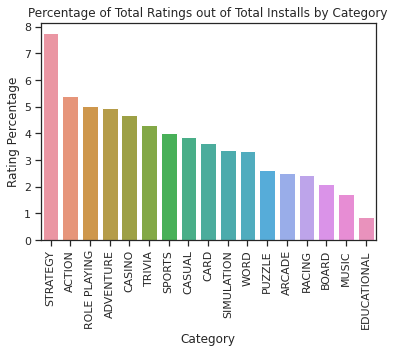

In [105]:
most_rated = android_df[['category', 'total ratings', 'installs']].groupby('category').sum()
rating_percentage = (most_rated['total ratings'] / most_rated['installs'] * 100).round(2)
most_rated["rating_percentage"] = rating_percentage

# sort by rating_percentage column in descending order
most_rated = most_rated.sort_values(by='rating_percentage', ascending=False)

# Plot values to a barplot
ax = sns.barplot(x=most_rated.index, y="rating_percentage", data=most_rated)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('Percentage of Total Ratings out of Total Installs by Category')
plt.xlabel('Category')
plt.ylabel('Rating Percentage')

plt.show()